In [17]:
import transformers
import torch
import torch.nn as nn
import torch.functional as F

In [13]:
from utils.bert_models import MultiNNLayerParasiteLearnedBERT

In [14]:
m = MultiNNLayerParasiteLearnedBERT().cuda()

In [19]:
criterion = nn.CrossEntropyLoss()

In [24]:
import pandas as pd
from data.bert_processors.processors import QNLI, Tokenize_Transform2, RTE
import numpy as np
from loguru import logger

class Args:
    def __init__(self):
        self.max_seq_length = 400
        self.model = 'QNLI'
        
args = Args()

In [25]:
tokenizer = Tokenize_Transform2(args, 'bert-base-uncased')

In [26]:
qqp = RTE('train', transform = tokenizer)

In [28]:
length = []
for i in range(len(qqp)):
    length.append(qqp[i]['attention_mask'].numpy().sum())
    if not i % 10000:
        print(i)

0


In [29]:
max(length)

289

(array([ 531., 1122.,  292.,  201.,  191.,   88.,   50.,   11.,    2.,
           2.]),
 array([ 13. ,  40.6,  68.2,  95.8, 123.4, 151. , 178.6, 206.2, 233.8,
        261.4, 289. ]),
 <BarContainer object of 10 artists>)

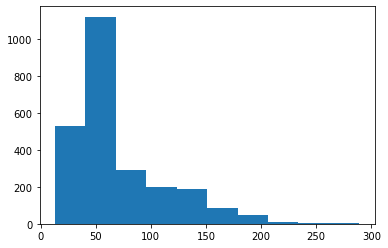

In [30]:
import matplotlib.pyplot as plt
plt.hist(length)

In [12]:
np.percentile(length, 95
             )

82.0